# Youtube Views Prediction

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Read both test and train csv file
df_train = pd.read_csv("youtube_train.csv", na_values=' ')
df_test = pd.read_csv("youtube_test.csv", na_values=' ')
df_train.shape

(4533, 19)

In [3]:
df_train.describe()

,subscriber,Trend_day_count,Tag_count,Trend_tag_count,comment_count,likes,dislike
count,4.502000e+03,4533.000000,4532.000000,4532.000000,3084.000000,4.533000e+03,4533.000000
mean,3.571822e+06,7.535407,17.969109,6.199250,164071.698768,9.769338e+03,5855.016325
std,2.420216e+07,65.999030,67.560453,147.056849,80581.581656,1.917311e+04,4830.100770
min,0.000000e+00,0.000000,0.000000,1.000000,23008.000000,0.000000e+00,0.000000
25%,2.428800e+05,4.000000,12.000000,2.000000,95040.750000,0.000000e+00,0.000000
50%,1.195770e+06,7.000000,17.000000,4.000000,162631.500000,1.038200e+04,5442.000000
75%,3.766915e+06,10.000000,21.000000,6.000000,235984.250000,1.500100e+04,10138.000000
max,1.576229e+09,4444.000000,3225.000000,9903.000000,299877.000000,1.213628e+06,14916.000000


In [4]:
#Convert object columns to numeric and treat incorrect values
df_train = df_train[df_train.views!='#VALUE!']
df_train = df_train.replace(' ', np.nan, regex=True)
df_train['category_id'] = df_train['category_id'].replace('“24', '24', regex=True)
df_test = df_test.replace(' ', np.nan, regex=True)
df_train['views'] = pd.to_numeric(df_train['views'])
df_train['comment_count'] = pd.to_numeric(df_train['comment_count'])
df_train['Trend_tag_count'] = pd.to_numeric(df_train['Trend_tag_count'], errors='coerce')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4532 entries, 0 to 4532
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Video_id               4532 non-null   object 
 1   publish_date           4530 non-null   object 
 2   trending_date          4530 non-null   object 
 3   category_id            4525 non-null   object 
 4   channel_title          1886 non-null   object 
 5   subscriber             4502 non-null   float64
 6   title                  11 non-null     object 
 7   tags                   327 non-null    object 
 8   description            19 non-null     object 
 9   Trend_day_count        4532 non-null   int64  
 10  Tag_count              4531 non-null   float64
 11  Trend_tag_count        4531 non-null   float64
 12  comment_count          3084 non-null   float64
 13  comment_disabled       4532 non-null   bool   
 14  like dislike disabled  4532 non-null   bool   
 15  like

In [5]:
df_test['Trend_tag_count'] = pd.to_numeric(df_test['Trend_tag_count'])
df_test['comment_count'] = pd.to_numeric(df_test['comment_count'])

In [6]:
#Check null values
print(df_train.isnull().sum())
print(df_test.isnull().sum())

Video_id                    0
publish_date                2
trending_date               2
category_id                 7
channel_title            2646
subscriber                 30
title                    4521
tags                     4205
description              4513
Trend_day_count             0
Tag_count                   1
Trend_tag_count             1
comment_count            1448
comment_disabled            0
like dislike disabled       0
likes                       0
dislike                     0
tag appered in title        1
views                       0
dtype: int64
Video_id                    0
publish_date                0
trending_date               0
category_id                 1
channel_title             801
subscriber                  8
title                    1329
tags                     1263
description              1330
Trend_day_count             0
Tag_count                   0
Trend_tag_count             0
comment_count             433
comment_disabled           

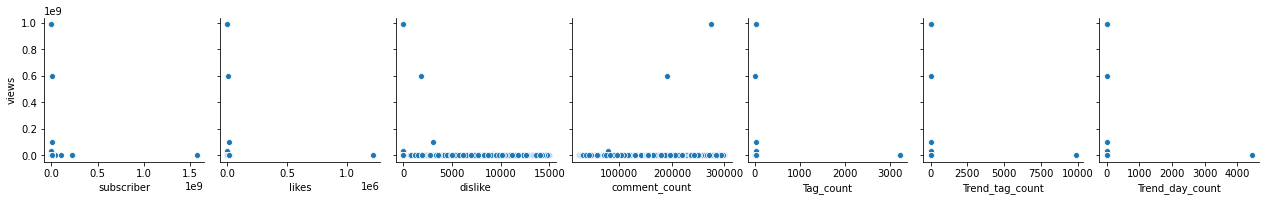

In [7]:
#Visualisation of relationship between dependent and independent variables
sns.pairplot(data=df_train,x_vars=["subscriber","likes","dislike","comment_count","Tag_count","Trend_tag_count","Trend_day_count"],y_vars="views",
            kind='scatter')

In [8]:
#Find Correlation
correlation_matrix = df_train.corr().round(2)
correlation_matrix

,subscriber,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,views
subscriber,1.00,-0.00,-0.00,-0.00,-0.01,0.01,0.02,-0.01,-0.02,0.01
Trend_day_count,-0.00,1.00,-0.00,0.00,-0.01,0.01,-0.01,0.00,0.01,-0.00
Tag_count,-0.00,-0.00,1.00,0.00,0.02,-0.01,0.04,-0.01,-0.03,-0.00
Trend_tag_count,-0.00,0.00,0.00,1.00,0.02,-0.02,-0.01,-0.00,-0.01,-0.00
comment_count,-0.01,-0.01,0.02,0.02,1.00,NaN,-0.01,-0.01,-0.01,0.03
comment_disabled,0.01,0.01,-0.01,-0.02,NaN,1.00,-0.01,0.02,0.02,0.02
like dislike disabled,0.02,-0.01,0.04,-0.01,-0.01,-0.01,1.00,-0.30,-0.71,0.02
likes,-0.01,0.00,-0.01,-0.00,-0.01,0.02,-0.30,1.00,0.34,-0.01
dislike,-0.02,0.01,-0.03,-0.01,-0.01,0.02,-0.71,0.34,1.00,-0.02
views,0.01,-0.00,-0.00,-0.00,0.03,0.02,0.02,-0.01,-0.02,1.00


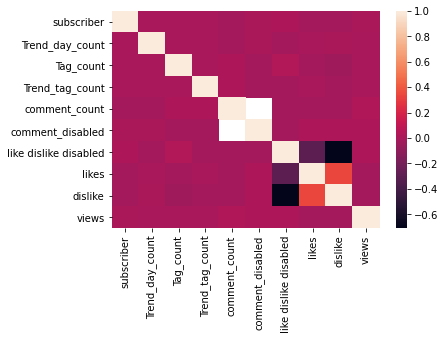

In [9]:
sns.heatmap(data=correlation_matrix, annot=False)

In [10]:
#Handle categorical variable using dummmies
cat_vars =['category_id','tag appered in title']
for var in cat_vars:
    cat_list = 'var'+'_'+var
    
    cat_list = pd.get_dummies(df_test[var],prefix=var,drop_first =True)
    data1 = df_test.join(cat_list)
    
    df_test=data1
    
df_test.head()

,Video_id,publish_date,trending_date,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,...,category_id_22.0,category_id_23.0,category_id_24.0,category_id_25.0,category_id_26.0,category_id_27.0,category_id_28.0,category_id_29.0,category_id_117.0,tag appered in title_True
0,WCX89DKM16,2018-01-25,2018-01-31,22.0,BLACKPINK,5997223.0,NaN,NaN,NaN,7,...,1,0,0,0,0,0,0,0,0,0
1,IDN40TVg92,2018-01-23,2018-02-01,15.0,NaN,422.0,NaN,NaN,NaN,10,...,0,0,0,0,0,0,0,0,0,1
2,XDX84IG\42,2018-01-25,2018-02-01,20.0,Nintendo,3766915.0,NaN,NaN,NaN,7,...,0,0,0,0,0,0,0,0,0,0
3,BKF81QSe54,2018-01-25,2018-01-31,25.0,NaN,647451.0,NaN,NaN,NaN,1,...,0,0,0,1,0,0,0,0,0,1
4,CRW97PJK80,2018-01-26,2018-02-01,10.0,NaN,209832.0,NaN,NaN,NaN,8,...,0,0,0,0,0,0,0,0,0,1


In [11]:
for var in cat_vars:
    cat_list = 'var'+'_'+var
    
    cat_list = pd.get_dummies(df_train[var],prefix=var,drop_first =True)
    data1 = df_train.join(cat_list)
    
    df_train=data1
    
df_train.head()

,Video_id,publish_date,trending_date,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,...,category_id_226,category_id_23,category_id_24,category_id_25,category_id_26,category_id_27,category_id_28,category_id_29,category_id_43,tag appered in title_True
0,HDR9SQc79,13-11-2017,20-11-2017,22,CaseyNeistat,9086142.0,NaN,NaN,NaN,6,...,0,0,0,0,0,0,0,0,0,0
1,KNH52UF?48,13-11-2017,20-11-2017,24,LastWeekTonight,5937292.0,NaN,NaN,NaN,1,...,0,0,1,0,0,0,0,0,0,0
2,QTW28IRG36,12-11-2017,20-11-2017,23,NaN,4191209.0,NaN,NaN,NaN,10,...,0,1,0,0,0,0,0,0,0,1
3,MGL76WI]26,13-11-2017,20-11-2017,24,NaN,13186408.0,NaN,NaN,NaN,12,...,0,0,1,0,0,0,0,0,0,1
4,TWP93KXT70,12-11-2017,19-11-2017,224,nigahiga,20563106.0,NaN,NaN,NaN,11,...,0,0,0,0,0,0,0,0,0,1


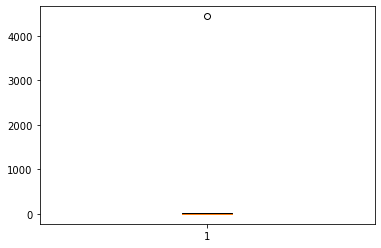

In [12]:
plt.boxplot(df_train["Trend_day_count"])
plt.show()

In [13]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn,[25,75])
    IQR = Q3 - Q1
    low_range = Q1 - (1.5 * IQR)
    up_range = Q3 +(1.5 * IQR)
    return low_range,up_range

In [14]:
lowerbd ,upperbd = outlier_treatment(df_train.subscriber)
df_train.drop(df_train[(df_train.subscriber > upperbd)|(df_train.subscriber < lowerbd)].index,inplace=True)

In [15]:
lowerbd ,upperbd = outlier_treatment(df_train.Trend_day_count)
df_train.drop(df_train[(df_train.Trend_day_count > upperbd)|(df_train.Trend_day_count < lowerbd)].index,inplace=True)

In [16]:
lowerbd ,upperbd = outlier_treatment(df_train.Tag_count)
df_train.drop(df_train[(df_train.Tag_count > upperbd)|(df_train.Tag_count < lowerbd)].index,inplace=True)

In [17]:
lowerbd ,upperbd = outlier_treatment(df_train.comment_count)
df_train.drop(df_train[(df_train.comment_count > upperbd)|(df_train.comment_count < lowerbd)].index,inplace=True)

In [18]:
lowerbd ,upperbd = outlier_treatment(df_train.likes)
df_train.drop(df_train[(df_train.likes > upperbd)|(df_train.likes < lowerbd)].index,inplace=True)

In [19]:
lowerbd ,upperbd = outlier_treatment(df_train.dislike)
df_train.drop(df_train[(df_train.dislike> upperbd)|(df_train.dislike < lowerbd)].index,inplace=True)

In [20]:
lowerbd ,upperbd = outlier_treatment(df_train.views)
df_train.drop(df_train[(df_train.views> upperbd)|(df_train.views < lowerbd)].index,inplace=True)

In [21]:
lowerbd ,upperbd = outlier_treatment(df_train.Trend_tag_count)
df_train.drop(df_train[(df_train.Trend_tag_count> upperbd)|(df_train.Trend_tag_count < lowerbd)].index,inplace=True)

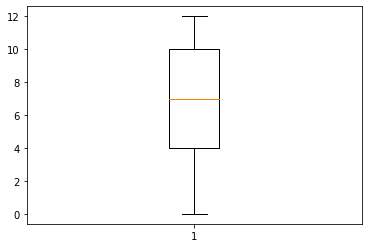

In [22]:
plt.boxplot(df_train["Trend_day_count"])
plt.show()

In [23]:
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date
df_train['trending_date']= pd.to_datetime(df_train['trending_date']) 
df_train['publish_date']= pd.to_datetime(df_train['publish_date'])
df_train['diff_days'] = df_train['trending_date'] - df_train['publish_date']
df_train['diff_days']=df_train['diff_days']/np.timedelta64(1,'D')


In [24]:
df_train= df_train.drop(["Video_id","category_id","category_id","channel_title","title","tags","channel_title","title","publish_date",'trending_date','description','comment_disabled','like dislike disabled','tag appered in title'],axis=1)

In [25]:
df_train.isnull().sum()

subscriber                     28
Trend_day_count                 0
Tag_count                       1
Trend_tag_count                 1
comment_count                1339
likes                           0
dislike                         0
views                           0
category_id_10                  0
category_id_117                 0
category_id_122                 0
category_id_15                  0
category_id_17                  0
category_id_19                  0
category_id_2                   0
category_id_20                  0
category_id_210                 0
category_id_22                  0
category_id_2225                0
category_id_224                 0
category_id_226                 0
category_id_23                  0
category_id_24                  0
category_id_25                  0
category_id_26                  0
category_id_27                  0
category_id_28                  0
category_id_29                  0
category_id_43                  0
tag appered in

In [26]:
df_train['Trend_tag_count'].fillna(df_train['Trend_tag_count'].median(), inplace=True)
df_train['comment_count'].fillna(df_train['comment_count'].median(), inplace=True)
df_train['subscriber'].fillna(df_train['subscriber'].median(), inplace=True)
df_train['Tag_count'].fillna(df_train['Tag_count'].median(), inplace=True)

In [27]:
df=pd.DataFrame(df_train) 
df.dropna(inplace=True,axis =0)

In [28]:
df.isnull().sum()

subscriber                   0
Trend_day_count              0
Tag_count                    0
Trend_tag_count              0
comment_count                0
likes                        0
dislike                      0
views                        0
category_id_10               0
category_id_117              0
category_id_122              0
category_id_15               0
category_id_17               0
category_id_19               0
category_id_2                0
category_id_20               0
category_id_210              0
category_id_22               0
category_id_2225             0
category_id_224              0
category_id_226              0
category_id_23               0
category_id_24               0
category_id_25               0
category_id_26               0
category_id_27               0
category_id_28               0
category_id_29               0
category_id_43               0
tag appered in title_True    0
diff_days                    0
dtype: int64

In [29]:
df_train= df_train.drop(["category_id_226","category_id_122","category_id_2225","category_id_224","category_id_43","category_id_210"],axis=1)

In [30]:
y = df['views']

In [31]:
X = df.drop('views',axis=1)
X

,subscriber,Trend_day_count,Tag_count,Trend_tag_count,comment_count,likes,dislike,category_id_10,category_id_117,category_id_122,...,category_id_23,category_id_24,category_id_25,category_id_26,category_id_27,category_id_28,category_id_29,category_id_43,tag appered in title_True,diff_days
0,9086142.0,6,21.0,6.0,162051.0,13342,6089,0,0,0,...,0,0,0,0,0,0,0,0,0,7.0
1,5937292.0,1,23.0,1.0,116266.0,5761,3044,0,0,0,...,0,1,0,0,0,0,0,0,0,7.0
2,4191209.0,10,22.0,3.0,257850.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,-21.0
5,4652602.0,10,9.0,1.0,198248.0,8619,3697,0,0,0,...,0,0,0,0,0,1,0,0,1,7.0
6,5292034.0,4,17.0,5.0,162051.0,9951,937,0,0,0,...,0,1,0,0,0,0,0,0,0,-23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4528,9133669.0,9,10.0,1.0,162051.0,18016,13995,0,0,0,...,0,0,0,0,1,0,0,0,1,30.0
4529,5292034.0,3,8.0,1.0,94868.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,30.0
4530,1568812.0,5,22.0,1.0,241644.0,7795,6940,0,0,0,...,0,1,0,0,0,0,0,0,1,30.0
4531,1607518.0,7,15.0,2.0,162051.0,11795,10139,0,0,0,...,0,0,0,0,1,0,0,0,1,30.0


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.33,random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2741, 30)
(1351, 30)
(2741,)
(1351,)


In [33]:
from sklearn import datasets, ensemble
from sklearn.metrics import mean_squared_error

In [34]:
reg = ensemble.GradientBoostingRegressor()
reg.fit(X_train, Y_train)

GradientBoostingRegressor()

In [35]:
Y_pred = reg.predict(X_test)
Y_pred[:10]

array([ 622223.58810821,   95347.20095098, 1278901.00929647,
        399926.40039629, 2100337.85168685, 1090160.4224349 ,
        522753.85255528,  578625.71902626, 1366025.39550286,
       1423568.56653755])

In [36]:
print(Y_test[:10])

2514     591594
2620      78845
3647    1282474
1734     447818
1100    2117989
3529    1024752
4244     476785
3805     506880
1664    1407839
3290    1700034
Name: views, dtype: int64


In [37]:
from sklearn import metrics
print('R Squared:',metrics.r2_score(Y_test,Y_pred))
print('Mean Abs Error:',metrics.mean_absolute_error(Y_test,Y_pred))
print('Mean Sqr Error:',metrics.mean_squared_error(Y_test,Y_pred))
print('Root Mean Sqr Error:',np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

R Squared: 0.9656140928960664
Mean Abs Error: 41844.53230558503
Mean Sqr Error: 8369128018.419182
Root Mean Sqr Error: 91482.93840066125
